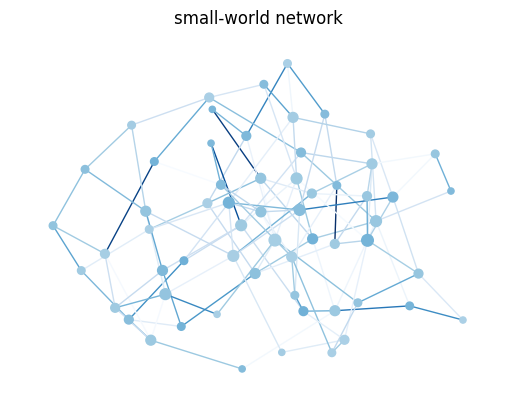

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Generate the graph
n = 60 # Number of nodes
k = 5 # Number of initial links
p = 0.5 # Probability of rewiring
seed = 500
G = nx.watts_strogatz_graph(n, k, p, seed)


# Customize the graph
# Calculate the degree of each node
degrees = dict(G.degree())
# Sort nodes by degree and select the top n
hubs = sorted(degrees, key=degrees.get, reverse=True)[:0]
for node in G.nodes():
  if node in hubs:
    G.nodes[node]['color'] = 'black'
  else:
    G.nodes[node]['color'] = 'gray'
  G.nodes[node]['size'] = G.degree(node)

# Assign weights to edges
W = np.zeros((n, n)) # Initialize the weight matrix with zeros
for u, v in G.edges(): # Loop over the edges in the graph
  w = np.random.uniform(low=0, high=1) # Generate a random number between 0 and 1
  W[u][v] = w # Assign the weight to the edge
  W[v][u] = w
np.fill_diagonal(W, np.random.uniform(low=0.5, high=1, size=n)) # Assign self-loop values
# Separate the diagonal and the rest of the matrix
D = np.diag(W) # Extract the diagonal as a 1D array
R = W - np.diag(D) # Subtract the diagonal from the matrix to get the rest
# Make sure the sum of each row does not exceed 0.5
R = R / np.sum(R, axis=1, keepdims=True) * 0.499999 # Normalize and scale each row
# Blend the diagonal and the rest into one matrix
W = R + np.diag(D) # Add the diagonal back to the matrix
# Cap the D between (0.5, 1)
D = np.clip(D, 0.5, 1) # Limit the values in D to the range [0.5, 1]
W = R + np.diag(D) # Update the matrix with the clipped D
# Make the matrix row stochastic
W = W / np.sum(W, axis=1, keepdims=True) # Normalize each row
# Do not make the matrix symmetric
####################
W = np.load('W_matrix.npy')
####################
# Visualize the graph
pos = nx.spring_layout(G)
edge_colors = [W[u][v] for u, v in G.edges()]
node_colors = [G.nodes[node]['color'] for node in G.nodes()]
node_sizes = [G.nodes[node]['size'] for node in G.nodes()]
node_dotsizes = [G.nodes[node]['size'] * 10 for node in G.nodes()]
node_dotcolors = ['blue' if i in hubs else plt.cm.Blues(1 - W[i][i]) for i in range(n)]
#node_colors = ['black' if node in hubs else 'red' for node in G.nodes()]
fig, ax = plt.subplots()
nx.draw_networkx_nodes(G, pos=pos, node_color=node_colors,
                       node_size=node_sizes, ax=ax)
nx.draw_networkx_edges(G, pos=pos, edge_color=edge_colors,
                       edge_cmap=plt.cm.Blues, ax=ax)
nx.draw_networkx_nodes(G, pos=pos, node_color=node_dotcolors,
                       node_size=node_dotsizes, ax=ax)
ax.set_title('small-world network')
ax.set_axis_off()
plt.show()

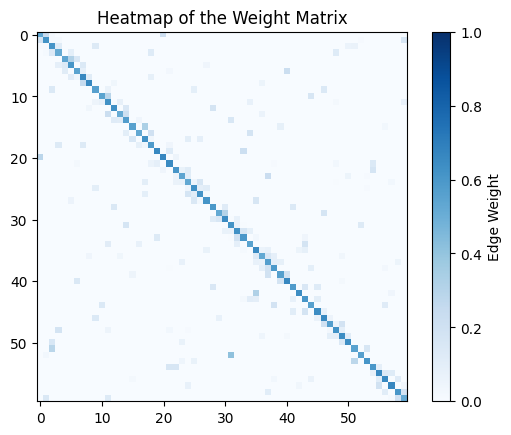

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Create a colormap that maps 1 to black
cmap = plt.cm.Blues
cmap.set_over('black')

# Create a normalization that sets the maximum to just below 1
norm = colors.Normalize(vmax=1)

# Plot the heatmap
plt.imshow(W, cmap=cmap, norm=norm, interpolation='nearest')
plt.colorbar(label='Edge Weight')
plt.title('Heatmap of the Weight Matrix')
plt.show()

In [ ]:
# Extract d and K vectors
K = np.diag(W)  # Self-loop weight values
d = np.count_nonzero(W, axis=1)  # Degree of each node is the count of non-zero elements in each row

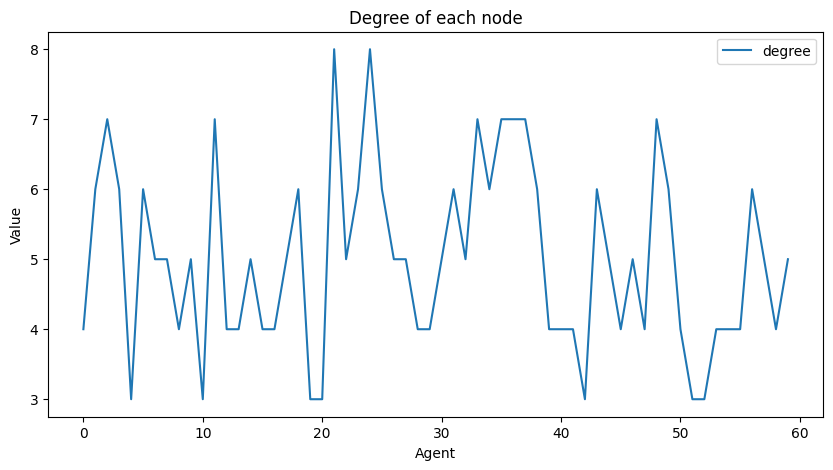

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(d, label='degree')
plt.xlabel('Agent')
plt.ylabel('Value')
plt.title('Degree of each node')
plt.legend()
plt.show()

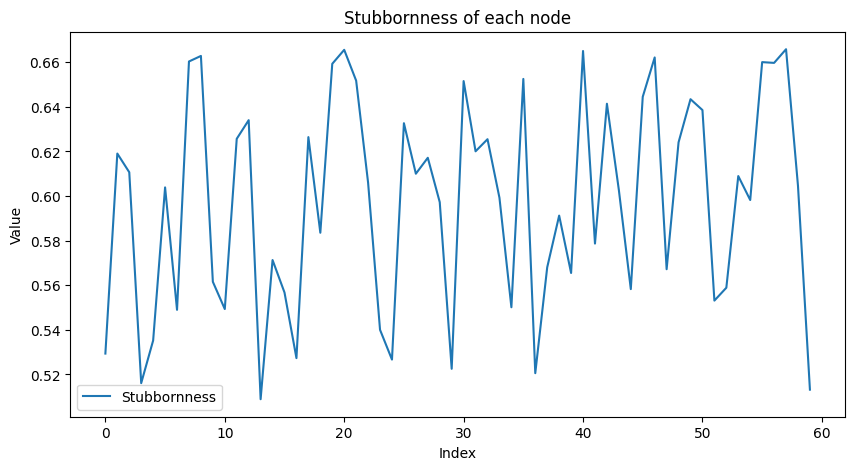

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(K, label='Stubbornness')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Stubbornness of each node')
plt.legend()
plt.show()

In [ ]:
import numpy as np

def is_row_stochastic(matrix):
    # Check if the matrix is row stochastic
    return np.allclose(matrix.sum(axis=1), 1)

print(is_row_stochastic(W))

True


In [ ]:
def DFS(G, node, visited):
    visited[node] = True
    for neighbor in G[node]:
        if not visited[neighbor]:
            DFS(G, neighbor, visited)

def is_strongly_connected(G):
    n = len(G)
    for start_node in range(n):
        visited = [False]*n
        DFS(G, start_node, visited)
        if not all(visited):
            return False
    return True

print(is_strongly_connected(G))

True


In [ ]:
import numpy as np

# Define a n array vector
s = np.zeros(n) # Initialize the vector with zeros

# Fill it with normally distributed numbers ranging (-1, 1)
s = np.random.normal(loc=0, scale=0.5, size=n) # Generate n random numbers from a normal distribution with mean 0 and standard deviation 0.5

In [ ]:
import numpy as np

# Given vector s
s = np.array(s)

# Normalize the vector s
s = (s - np.min(s)) / (np.max(s) - np.min(s)) * 2 - 1 # Apply the formula
s = (s + 1) / 2

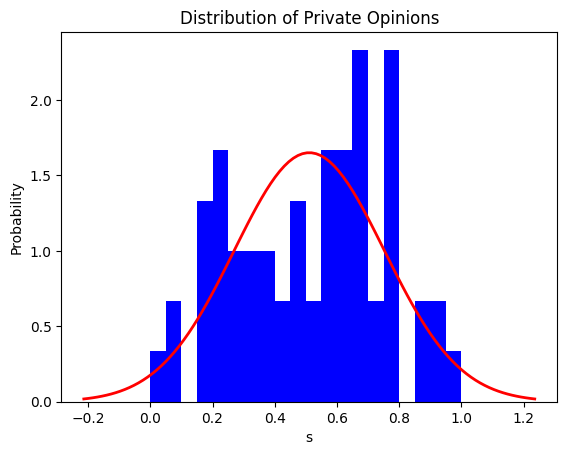

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given vector s
s = np.array(s) # Assuming s is defined and populated as per your previous code

# Plot the s
plt.hist(s, bins=20, density=True, color='blue') # Plot a histogram of s with 20 bins and normalized frequency
plt.xlabel('s') # Label the x-axis as s
plt.ylabel('Probability') # Label the y-axis as Probability
plt.title('Distribution of Private Opinions') # Give the plot a title

# Show the bell curve distribution
mu = np.mean(s) # Calculate the mean of s
sigma = np.std(s) # Calculate the standard deviation of s
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100) # Generate 100 points between mu - 3*sigma and mu + 3*sigma
y = (1/(sigma * np.sqrt(2 * np.pi))) * np.exp( - (x - mu)**2 / (2 * sigma**2)) # Calculate the normal distribution function
plt.plot(x, y, linewidth=2, color='red') # Plot the normal distribution curve in red
plt.show() # Show the plot

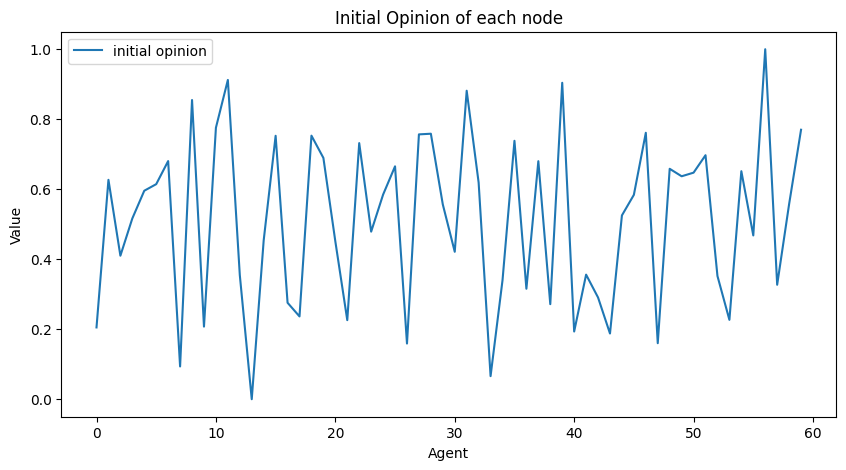

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(s, label='initial opinion')
plt.xlabel('Agent')
plt.ylabel('Value')
plt.title('Initial Opinion of each node')
plt.legend()
plt.show()

# Consensus

In [ ]:
# Set maximum number of iterations
max_iter = 1000

# Set convergence threshold
threshold = 1e-6

# Initialize difference
diff = np.inf

# Initialize list to store opinions at each time step
z_list = []

z = s

# Iterate until convergence or maximum iterations
for t in range(max_iter):
    # Store old opinions
    z_old = z.copy()

    # Update opinions
    for i in range(n):
        z[i] = ((1/(d[i] + K[i])) * sum(z[j] for j in range(n) if j != i and W[j, i] > 0)) + (K[i]/(d[i] + K[i])) * s[i]
        z[i] = min(z[i], 1)  # Limit the new value to 1

    # Store opinions
    z_list.append(z.copy())

    # Calculate difference
    diff = np.linalg.norm(z - z_old)

    # Check for convergence
    if diff < threshold:
        print(f'Converged in {t} iterations')
        break

if t == max_iter - 1:
    print('Did not converge')

Converged in 43 iterations


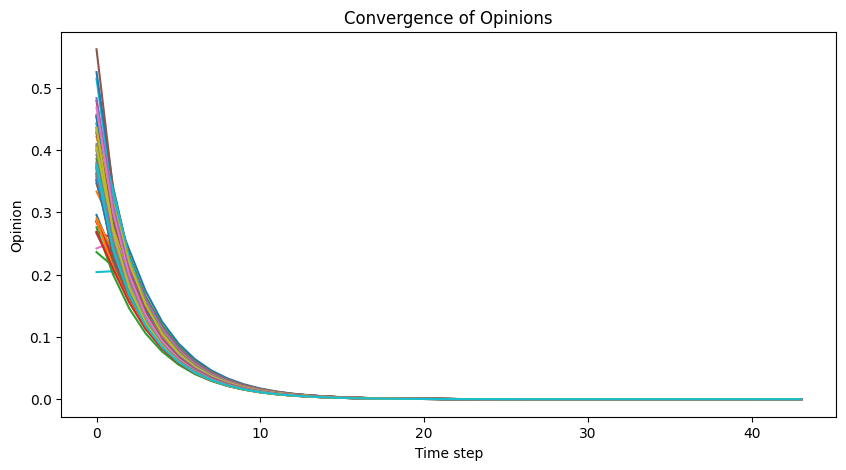

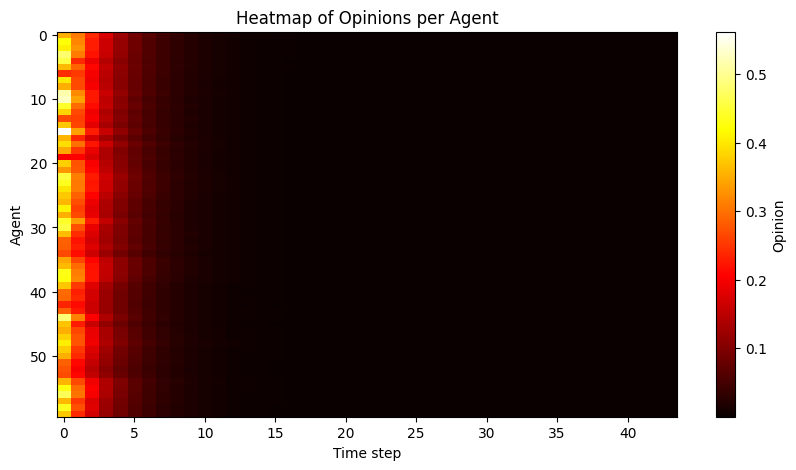

In [ ]:
# Convert list of opinions to array
z_array = np.array(z_list)

# Plot convergence
plt.figure(figsize=(10, 5))
plt.plot(z_array)
plt.xlabel('Time step')
plt.ylabel('Opinion')
plt.title('Convergence of Opinions')
plt.show()

# Plot heatmap of opinions per agent
plt.figure(figsize=(10, 5))
plt.imshow(z_array.T, aspect='auto', cmap='hot', interpolation='nearest')
plt.colorbar(label='Opinion')
plt.xlabel('Time step')
plt.ylabel('Agent')
plt.title('Heatmap of Opinions per Agent')
plt.show()

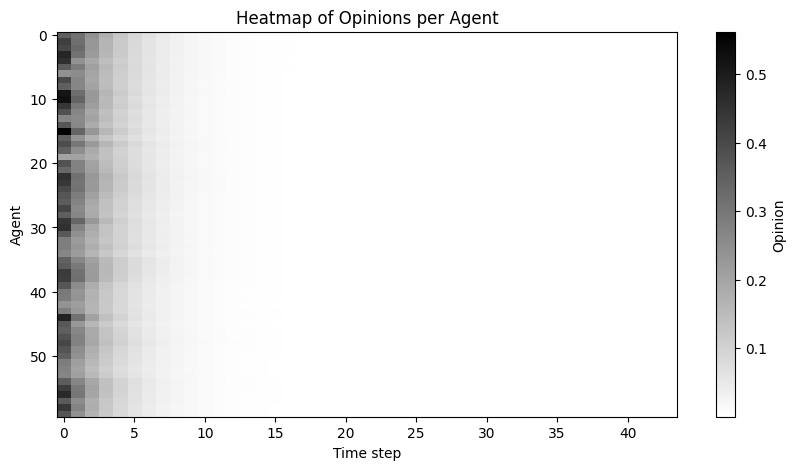

In [ ]:
# Plot heatmap of opinions per agent
plt.figure(figsize=(10, 5))
plt.imshow(z_array.T, aspect='auto', cmap='binary', interpolation='nearest')  # Change 'hot' to 'binary'
plt.colorbar(label='Opinion')
plt.xlabel('Time step')
plt.ylabel('Agent')
plt.title('Heatmap of Opinions per Agent')
plt.show()

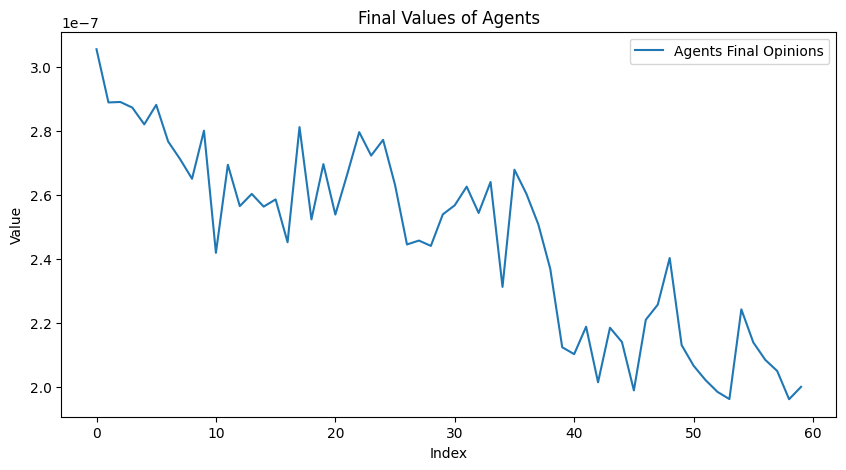

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(z_array[t], label='Agents Final Opinions')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Final Values of Agents')
plt.legend()
plt.show()

In [ ]:
j1 = 0
j2 = 0
J = 0

for i in range(n):
  j1 = K[i] * ((z_array[t, i] - z_array[0, i])**2)
  for j in range(n):
    if j != i and W[j, i] > 0:
      j2 += ((z_array[t, i] - z_array[t, j])**2)
  J += j1 + j2



J_consensus = 0.5 * J
J_consensus

2.592459899881592

Nash Equilibrium

In [ ]:
import numpy as np

n = len(d)

# Initialize A and B as zero matrices
A = np.zeros((n, n))
B = np.zeros((n, n))

# Define elements of A for all (i, j)
for i in range(n):
    for j in range(n):
        if j != i:
          A[i, j] = 1 / (d[i] + K[i])

# Define diagonal elements of B
for i in range(n):
    B[i, i] = K[i] / (d[i] + K[i])

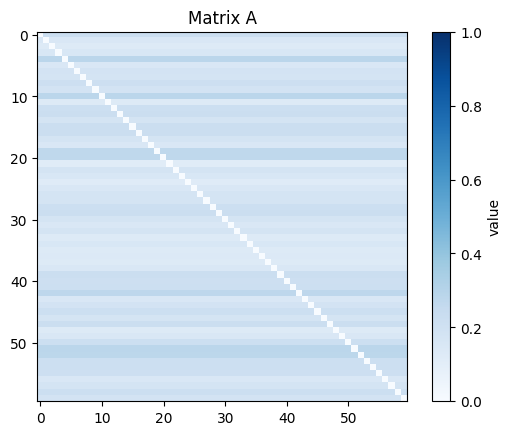

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Create a colormap that maps 1 to black
cmap = plt.cm.Blues
cmap.set_over('black')

# Create a normalization that sets the maximum to just below 1
norm = colors.Normalize(vmax=1)

# Plot the heatmap
plt.imshow(A, cmap=cmap, norm=norm, interpolation='nearest')
plt.colorbar(label='value')
plt.title('Matrix A')
plt.show()

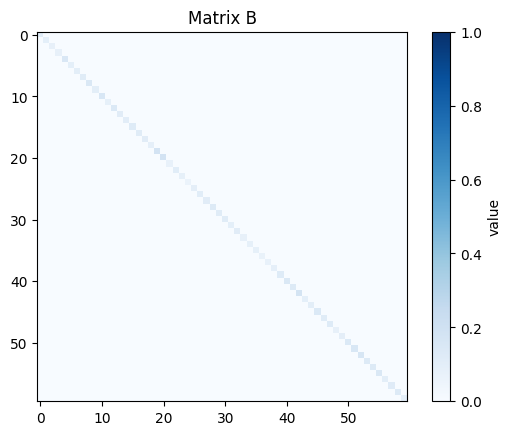

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Create a colormap that maps 1 to black
cmap = plt.cm.Blues
cmap.set_over('black')

# Create a normalization that sets the maximum to just below 1
norm = colors.Normalize(vmax=1)

# Plot the heatmap
plt.imshow(B, cmap=cmap, norm=norm, interpolation='nearest')
plt.colorbar(label='value')
plt.title('Matrix B')
plt.show()

In [ ]:
from numpy.linalg import inv
import numpy as np

# Teorical Nash Equilibrium
x_nash = inv(np.eye(n, n) - A) @ B @ z_array[0]

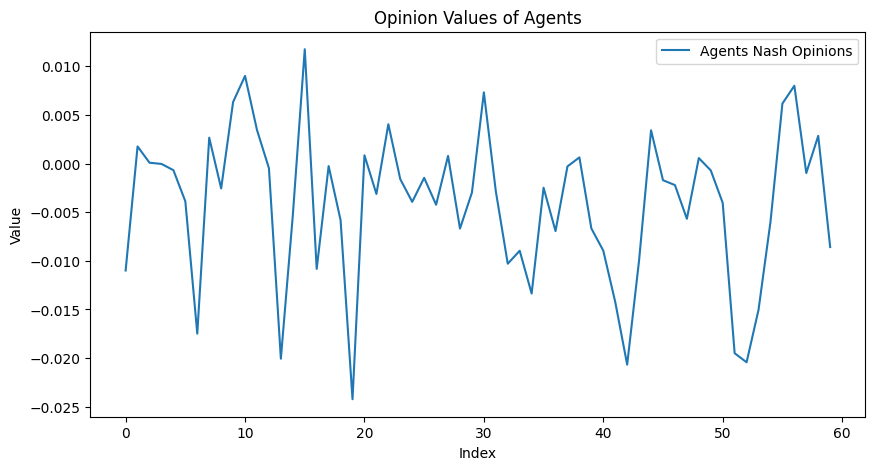

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(x_nash, label='Agents Nash Opinions')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Opinion Values of Agents')
plt.legend()
plt.show()

In [ ]:
j1 = 0
j2 = 0
J = 0

for i in range(n):
  j1 = K[i] * ((x_nash[i] - z_array[0, i])**2)
  for j in range(n):
    if j != i and W[j, i] > 0:
      j2 += ((x_nash[i] - x_nash[j])**2)
  J += j1 + j2



J_nash = 0.5 * J
J_nash

2.9455291678726856

Distributed Optimization

In [ ]:
# Set maximum number of iterations
max_iter = 2000

# Set convergence threshold
threshold = 1e-6

# Initialize difference
diff = np.inf

x = z_array[0].copy()

# Initialize a list to store x[i] at each iteration
x_values = []
j_values = []


for t in range(max_iter):
    # Initialize the new state of x
    x_new = np.copy(x)
    x_values.append(x.copy())
    j_values.append(np.copy(j))
    # Iterating over each agent to optimize using the given objective function
    for i in range(n):
        # Initialize the gradient for agent i
        gradient = 0

        for j in range(n):
            if j != i and W[j, i] > 0:
                gradient += W[j, i] * (x[i] - x[j])
                j = (x[i] - x[j])**2

        gradient += K[i] * (x[i] - s[i])
        j = 0.5 * ( j + K[i] * (x[i] - s[i])**2)


        # Update rule: Here we use a simple gradient descent step. You may need to replace this with your specific update rule.
        x_new[i] = x[i] - 0.5 * gradient  # learning rate

    # Calculate difference
    diff = np.linalg.norm(x_new - x)

    # Update x
    x = x_new

    # Check for convergence
    if diff < threshold:
        print(f'Converged in {t} iterations')
        break

if t == max_iter - 1:
    print('Did not converge')

Converged in 40 iterations


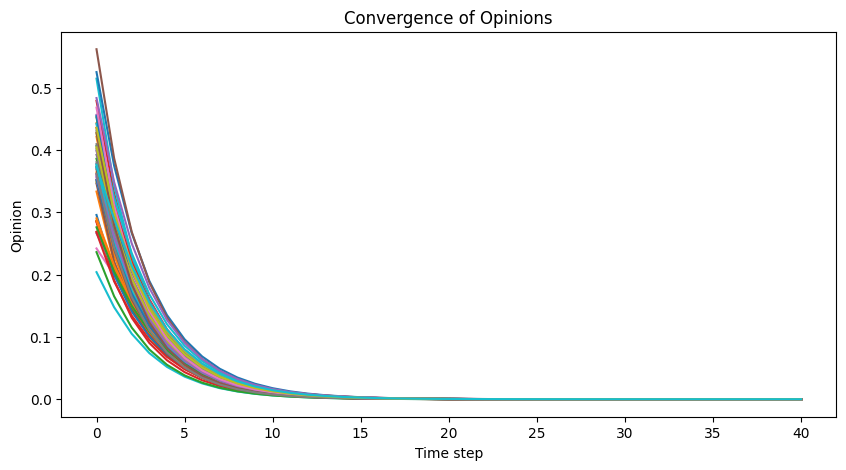

In [ ]:
# Convert the list to a numpy array
x_values = np.array(x_values)
# Plot convergence
plt.figure(figsize=(10, 5))
plt.plot(x_values)
plt.xlabel('Time step')
plt.ylabel('Opinion')
plt.title('Convergence of Opinions')
plt.show()

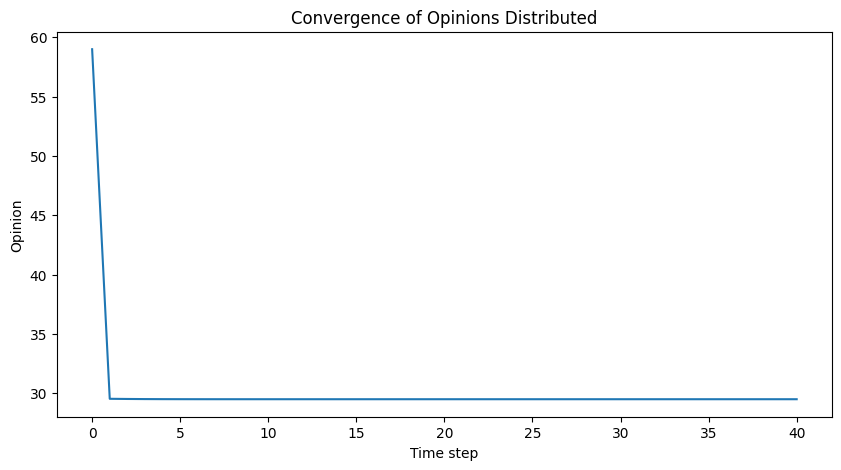

In [ ]:
# Convert the list to a numpy array
j_values = np.array(j_values)
# Plot convergence
plt.figure(figsize=(10, 5))
plt.plot(j_values)
plt.xlabel('Time step')
plt.ylabel('Opinion')
plt.title('Convergence of Opinions Distributed')
plt.show()

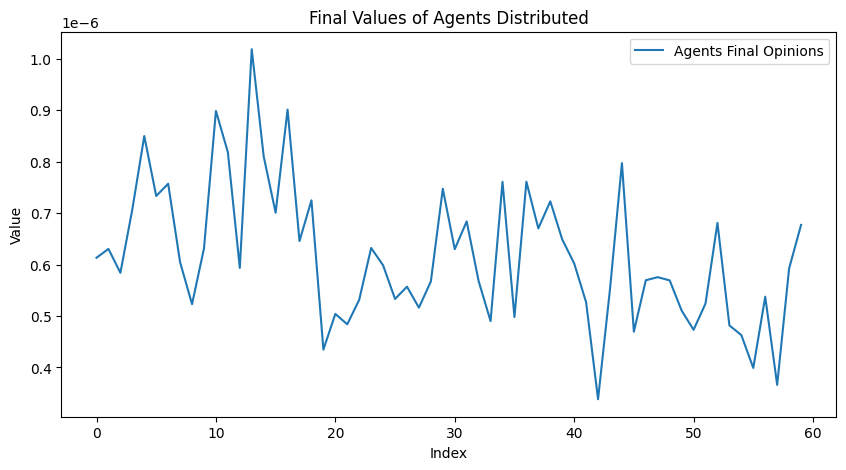

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(x_values[t], label='Agents Final Opinions')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Final Values of Agents Distributed')
plt.legend()
plt.show()

In [ ]:
j1 = 0
j2 = 0
J = 0
n = 60

for i in range(n):
  j1 = K[i] * ((x_values[t,i] - z_array[0, i])**2)
  for j in range(n):
    if j != i and W[j, i] > 0:
      j2 += ((x_values[t, i] - x_values[t, j])**2)
  J += j1 + j2



J_distributed = 0.5 * J
J_distributed

2.592454944622242

Centralized Optimization

In [ ]:
import cvxpy as cp
import numpy as np

# Variables for each agent
y = cp.Variable(n)
s = z_array[0]

j = [
    0.5 * cp.sum_squares(y[i] - y[j]) + 0.5 * K[i] * cp.square(y[i] - s[i])
    for i in range(n)
    for j in range(i+1, n)]

J = cp.sum(j)

# Constraints: all agents should agree on the decision variable x (consensus constraint)
constraints = [cp.abs(y[i] - y[j]) <= 1e-6 for i in range(n) for j in range(i+1, n)]


# Formulate the optimization problem
problem = cp.Problem(cp.Minimize(J), constraints)

# Solve the optimization problem
problem.solve()

J_centralized = J.value

/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:157: UserWarning: Objective contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn("Objective contains too many subexpressions. "


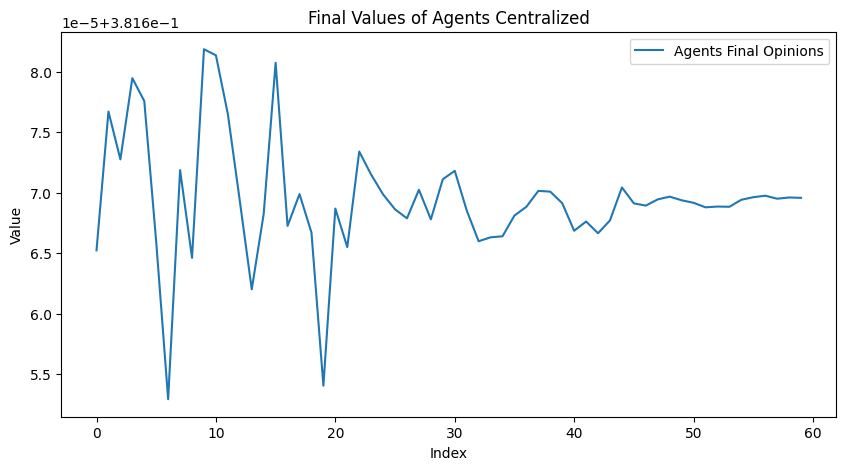

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y.value, label='Agents Final Opinions')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Final Values of Agents Centralized')
plt.legend()
plt.show()

In [ ]:
J_centralized

3.033291286638288

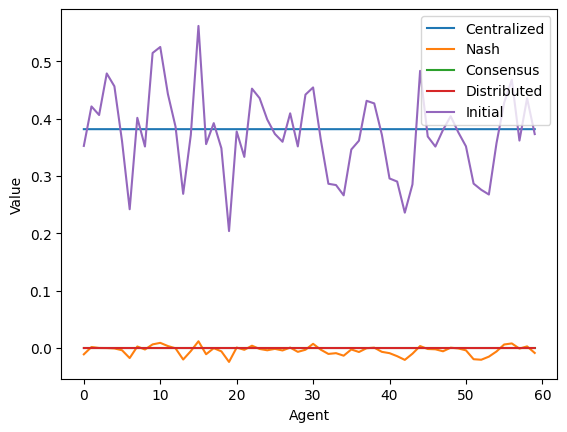

In [ ]:
import matplotlib.pyplot as plt


plt.plot(y.value, label='Centralized')
plt.plot(x_nash, label='Nash')
plt.plot(z_array[t], label='Consensus')
plt.plot(x_values[t], label='Distributed')
plt.plot(z_array[0], label='Initial')

plt.xlabel('Agent')
plt.ylabel('Value')
plt.legend()
plt.show()

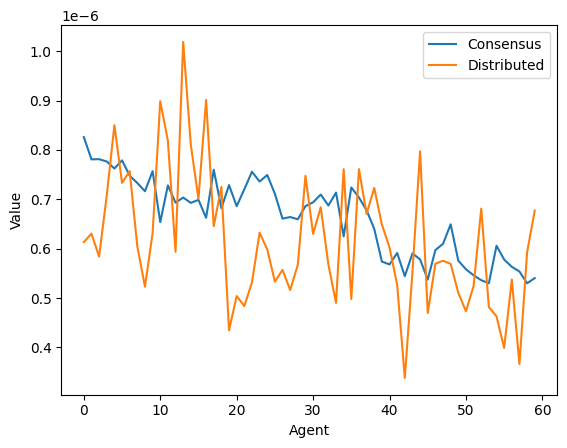

In [ ]:
import matplotlib.pyplot as plt

plt.plot(z_array[t], label='Consensus')
plt.plot(x_values[t], label='Distributed')

plt.xlabel('Agent')
plt.ylabel('Value')
plt.legend()
plt.show()

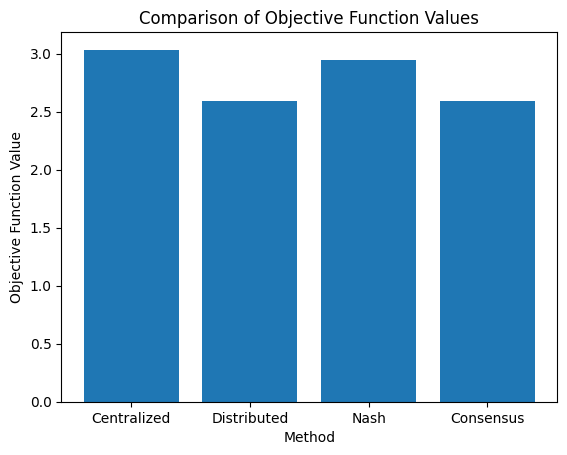

In [ ]:
import matplotlib.pyplot as plt

# Create a list of objective function values
J_values = [J_centralized, J_distributed, J_nash, J_consensus]

# Create a list of labels for the bar plot
labels = ['Centralized', 'Distributed', 'Nash', 'Consensus']

# Create a bar plot
plt.bar(labels, J_values)

plt.xlabel('Method')
plt.ylabel('Objective Function Value')
plt.title('Comparison of Objective Function Values')
plt.show()